In [11]:
import pandas as pd # 引用套件並縮寫為 pd  
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.width',1000)
df = pd.read_csv('/Users/xwlee/Desktop/ECt/hw3/train.csv') 
#2.1 以 DataFrame 格式載入 train.csv (5%)

In [12]:
x=df[['Sex','Pclass','Age','SibSp','Parch','Fare','Cabin','Embarked']]
y=df[['Survived']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=12,stratify=y)

In [13]:
#2.2 請檢察並列出 train.csv 中每個欄位的空值個數 (5%)
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#2.3 將 Age 欄位空值以平均值填入，Cabin 欄位的空值以 0 填入，其餘非空值填入 1 (5%)
df['Cabin'].loc[~df['Cabin'].isnull()] = 1  # not nan
df['Cabin']=df['Cabin'].replace(np.nan,0)
df['Age']=df['Age'].replace(np.nan,df['Age'].mean())
df

/Users/xwlee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,C


In [16]:
#2.4 將 Sex 與 Embarked 欄位轉為數字型態(例如:男性=0，女性=1) (10%)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Embarked'] = labelencoder.fit_transform(df['Embarked'].astype(str))
#df=pd.DataFrame(df)
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1,0


In [17]:
#df['Sex'].replace(['female','male'],[1,0],inplace=True)
#df['Embarked'].replace(['S','C','Q'],[-1,0,1],inplace=True)#S=-1,C=0,Q=1
#df['Embarked']=df['Embarked'].replace(np.nan,-1)
#df.info()

In [8]:
#2.5 請以 PassengerId、Survived、Name、Ticket 以外的欄位作為訓練資料，建 立 Decision tree 來預測 Survived，將訓練資料比例設為 50%，random_state 設 為 12，stratify = y，並繪出 Decision tree 的樹狀圖 (15%)
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

x=df[['Sex','Pclass','Age','SibSp','Parch','Fare','Cabin','Embarked']]
y=df[['Survived']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=12,stratify=y)

#標準化 :為了避免偏向某個變數去做訓練
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)

# 建立分類器
tree=DecisionTreeClassifier(criterion='gini',random_state =12)
tree_clf=tree.fit(x_train_nor,y_train)

# 預測
y_test_predicted = tree_clf.predict(x_test_nor)

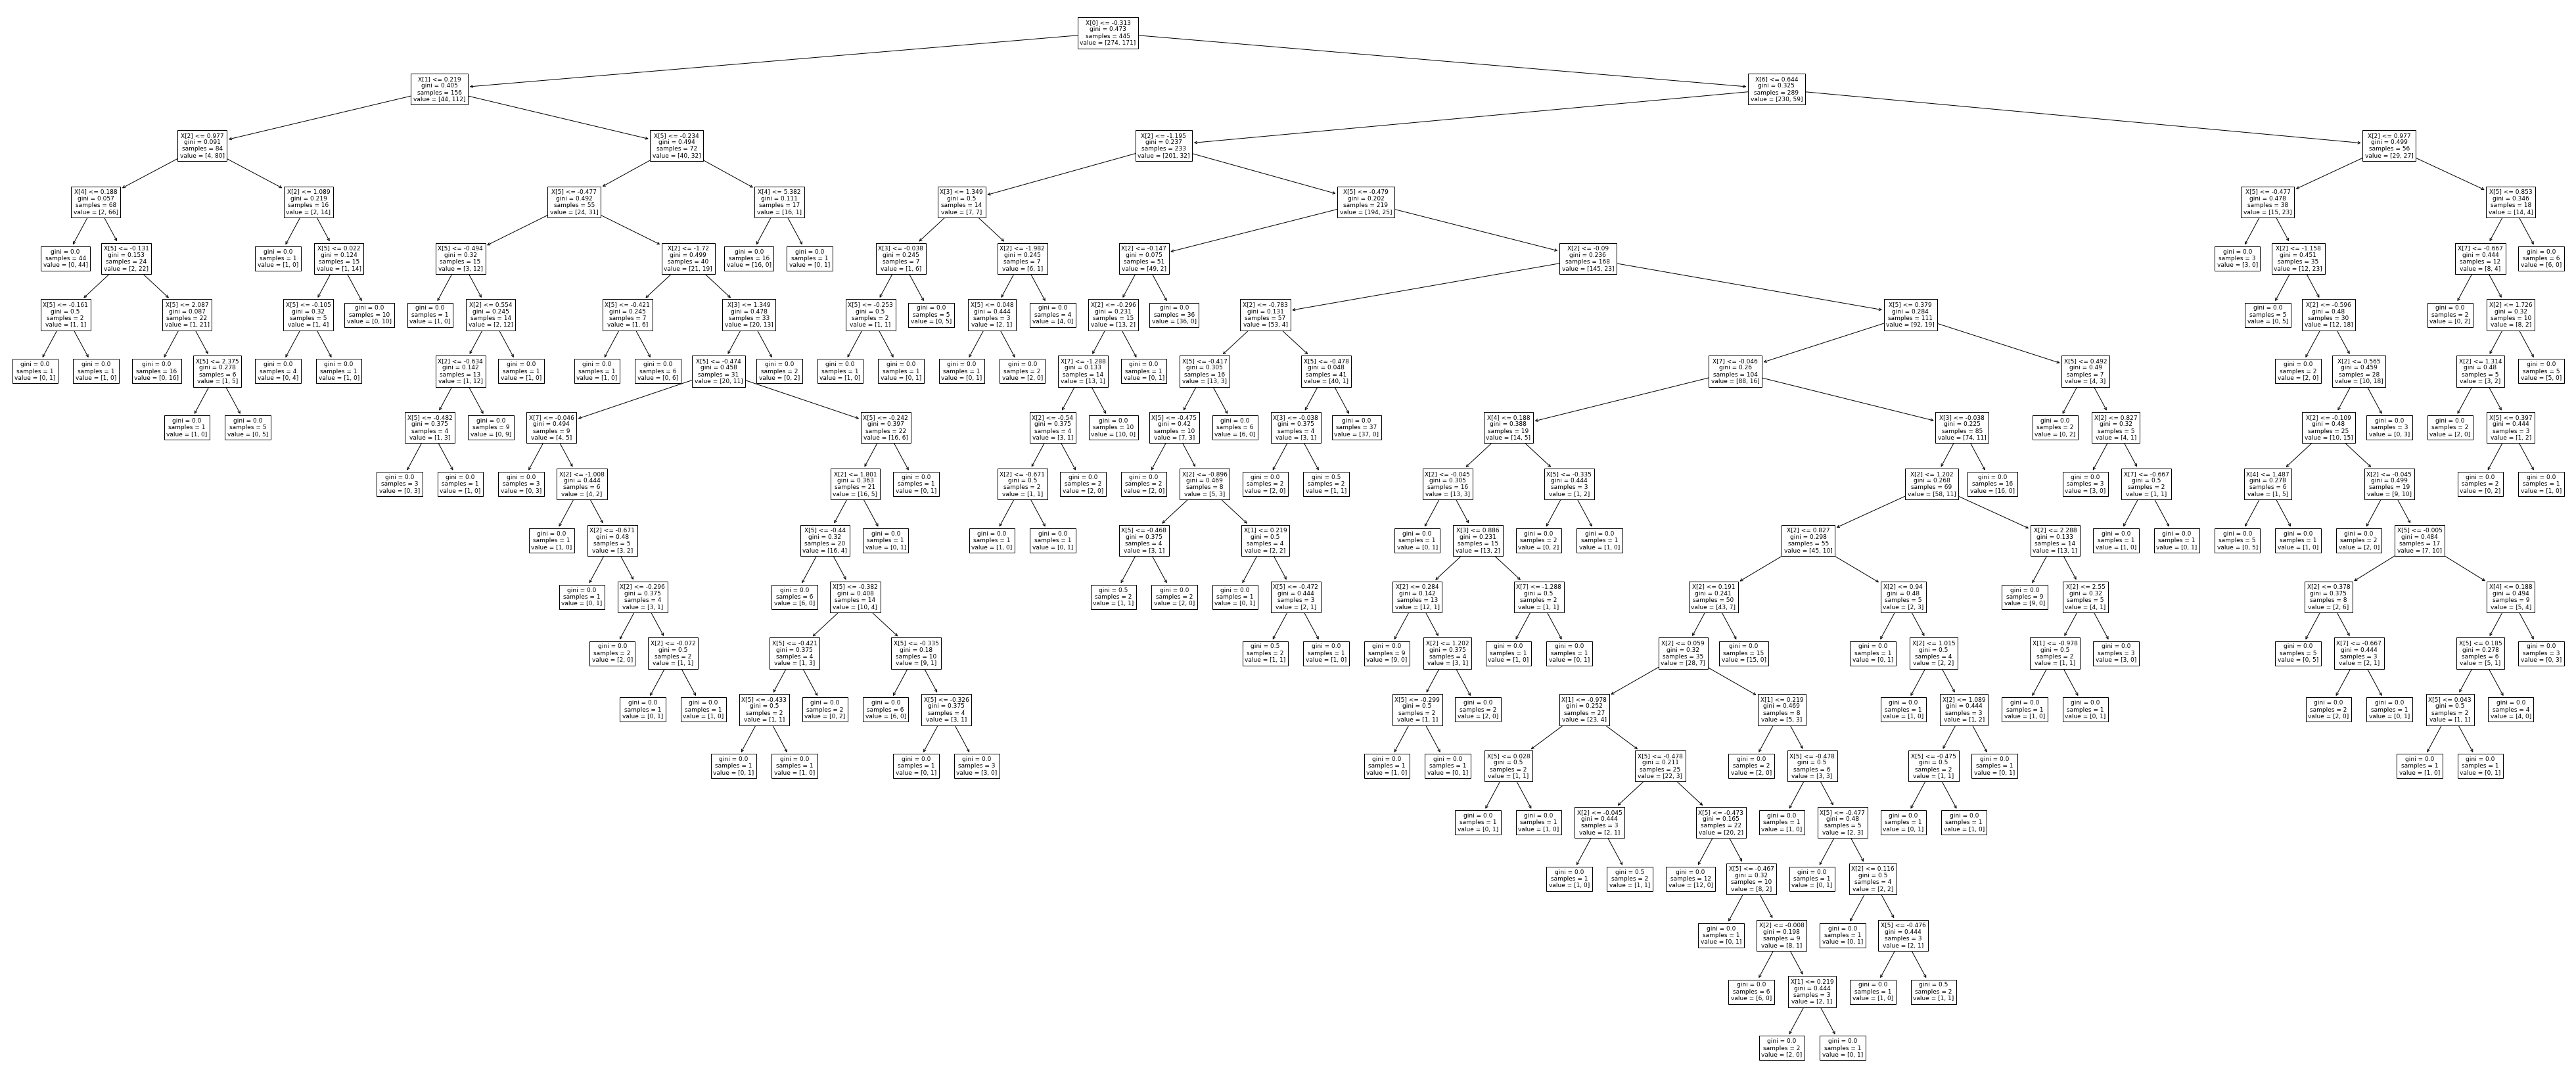

In [9]:
fig, ax=plt.subplots(figsize=(70,30))
plot_tree(tree_clf,ax=ax);

In [10]:
#2.6 計算出在測試資料上的平均準確率 (10%)
accuracy1 = metrics.accuracy_score(y_test, y_test_predicted)
print('準確率:',accuracy1)

準確率: 0.7892376681614349


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=12,stratify=y)
#標準化 :為了避免偏向某個變數去做訓練
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)
# 建立分類器
tree=DecisionTreeClassifier(criterion='gini',random_state =12)
tree_clf=tree.fit(x_train_nor,y_train)
# 預測
y_test_predicted = tree_clf.predict(x_test_nor)
accuracy2 = metrics.accuracy_score(y_test, y_test_predicted)
print('準確率:',accuracy2)

準確率: 0.7532710280373832


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=12,stratify=y)
#標準化 :為了避免偏向某個變數去做訓練
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)
# 建立分類器
tree=DecisionTreeClassifier(criterion='gini',random_state =12)
tree_clf=tree.fit(x_train_nor,y_train)
# 預測
y_test_predicted = tree_clf.predict(x_test_nor)
accuracy3 = metrics.accuracy_score(y_test, y_test_predicted)
print('準確率:',accuracy3)

準確率: 0.719551282051282


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=12,stratify=y)
#標準化 :為了避免偏向某個變數去做訓練
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)
# 建立分類器
tree=DecisionTreeClassifier(criterion='gini',random_state =12)
tree_clf=tree.fit(x_train_nor,y_train)
# 預測
y_test_predicted = tree_clf.predict(x_test_nor)
accuracy4 = metrics.accuracy_score(y_test, y_test_predicted)
print('準確率:',accuracy4)

準確率: 0.7685834502103787


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.9,random_state=12,stratify=y)
#標準化 :為了避免偏向某個變數去做訓練
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)
# 建立分類器
tree=DecisionTreeClassifier(criterion='gini',random_state =12)
tree_clf=tree.fit(x_train_nor,y_train)
# 預測
y_test_predicted = tree_clf.predict(x_test_nor)
accuracy5 = metrics.accuracy_score(y_test, y_test_predicted)
print('準確率:',accuracy5)

準確率: 0.6982543640897756


In [15]:
#2.7 請分別以訓練資料比例 60%、70%、80%、90% 建立 Decision tree， random_state 皆設為 12，並將不同資料比例與平均準確率的比較結果以 DataFrame 呈現，如下圖所示。 (10%)
scores = {"split_proportion":["50/50","60/40","70/30","80/20","90/10"],
          "score":[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5]}
score_df = pd.DataFrame.from_dict(scores)
score_df.head()

,split_proportion,score
0,50/50,0.789238
1,60/40,0.753271
2,70/30,0.719551
3,80/20,0.768583
4,90/10,0.698254


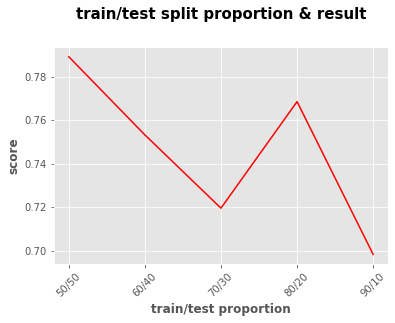

In [16]:
#2.8 承上題，將此比較結果以折線圖呈現，如下圖所示。 (10%)
ym = [None] * len(score_df["split_proportion"])     # 建立一個空列表，數量為Date的數量

# 以for迴圈逐一將年月資料類別轉成字串類別
for i in range(len(score_df["split_proportion"])):  
    ym[i] = str(score_df["split_proportion"][i])
    
score_df["split_proportion"] = ym 
plt.style.use("ggplot")               # 使用ggplot主題樣式

#畫第一條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(score_df["split_proportion"], score_df["score"],c = "r")  

# 設定圖例，參數為標籤、位置
plt.xlabel("train/test proportion", fontweight = "bold")                # 設定x軸標題及粗體
plt.ylabel("score", fontweight = "bold")    # 設定y軸標題及粗體
plt.title("train/test split proportion & result", fontsize = 15, fontweight = "bold", y = 1.1)   # 設定標題、文字大小、粗體及位置
plt.xticks(rotation=45)   # 將x軸數字旋轉45度，避免文字重疊

plt.show()